<a href="https://colab.research.google.com/github/buabaj/PM2.5-Time-Series-Analysis-and-Forecasting/blob/main/pm2_5_time_series_analysis_and_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = 'ghana-air-quality.csv'
df = pd.read_csv(data, parse_dates=True, index_col='date')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,pm25
date,
2022-01-04,101
2022-01-05,102
2022-01-06,130
2022-01-07,157
2022-01-08,131


In [100]:
#!pip install xplore
from xplore.data import xplore
xplore(df)

------------------------------------
The fist 5 entries of your dataset are:

             pm25
date             
2022-01-04    101
2022-01-05    102
2022-01-06    130
2022-01-07    157
2022-01-08    131


------------------------------------
The last 5 entries of your dataset are:

             pm25
date             
2020-06-30     57
2020-07-01     59
2020-03-30     81
2020-03-31     67
2020-04-01     56


------------------------------------
Stats on your dataset:

<bound method NDFrame.describe of              pm25
date             
2022-01-04    101
2022-01-05    102
2022-01-06    130
2022-01-07    157
2022-01-08    131
...           ...
2020-06-30     57
2020-07-01     59
2020-03-30     81
2020-03-31     67
2020-04-01     56

[634 rows x 1 columns]>


------------------------------------
The Value types of each column are:

 pm25    int64
dtype: object


------------------------------------
Info on your Dataset:

<bound method DataFrame.info of              pm25
date             

In [101]:
df.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='date', length=634, freq=None)

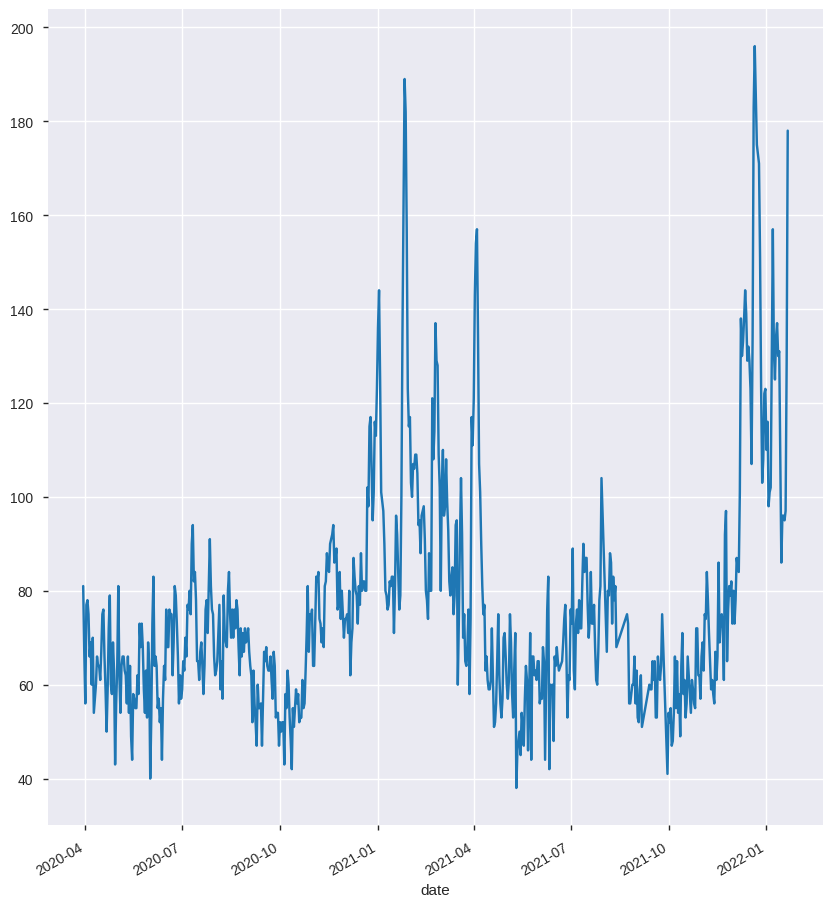

In [102]:
df[' pm25'].plot(figsize=(10,12))

<BarContainer object of 23 artists>

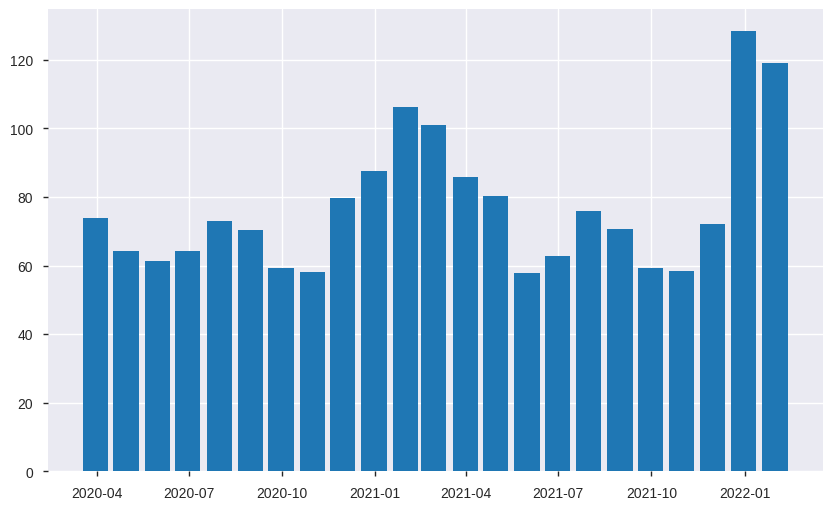

In [103]:
df_month = df.resample('M').mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_month['2020':].index, df_month.loc['2020':, " pm25"], width=25, align='center')

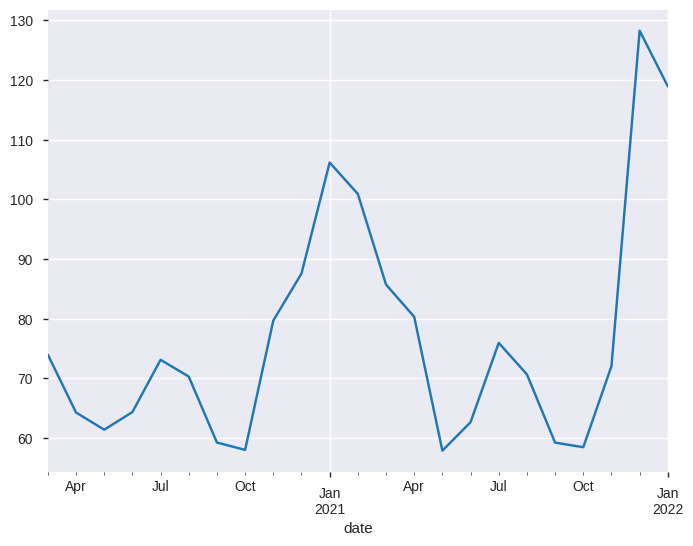

In [104]:
df_month[' pm25'].plot(figsize=(8,6))

In [105]:
print(df.resample('M'))

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [106]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month

In [107]:
df

,pm25,year,month
date,,,
2022-01-04,101,2022,1
2022-01-05,102,2022,1
2022-01-06,130,2022,1
2022-01-07,157,2022,1
2022-01-08,131,2022,1
...,...,...,...
2020-06-30,57,2020,6
2020-07-01,59,2020,7
2020-03-30,81,2020,3


In [108]:
import calendar
all_month_year_df = pd.pivot_table(df, values=" pm25",index=['month'], columns=['year'] ,fill_value=0,margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

year,2020,2021,2022,All
Jan,0.000000,106.193548,118.95,111.196078
Feb,0.000000,100.928571,0.00,100.928571
Mar,74.000000,85.741935,0.00,85.030303
Apr,64.300000,80.333333,0.00,72.316667
May,61.419355,57.903226,0.00,59.661290
Jun,64.366667,62.678571,0.00,63.551724
Jul,73.129032,75.966667,0.00,74.524590
Aug,70.322581,70.684211,0.00,70.460000
Sep,59.266667,59.250000,0.00,59.260000
Oct,58.032258,58.482759,0.00,58.250000


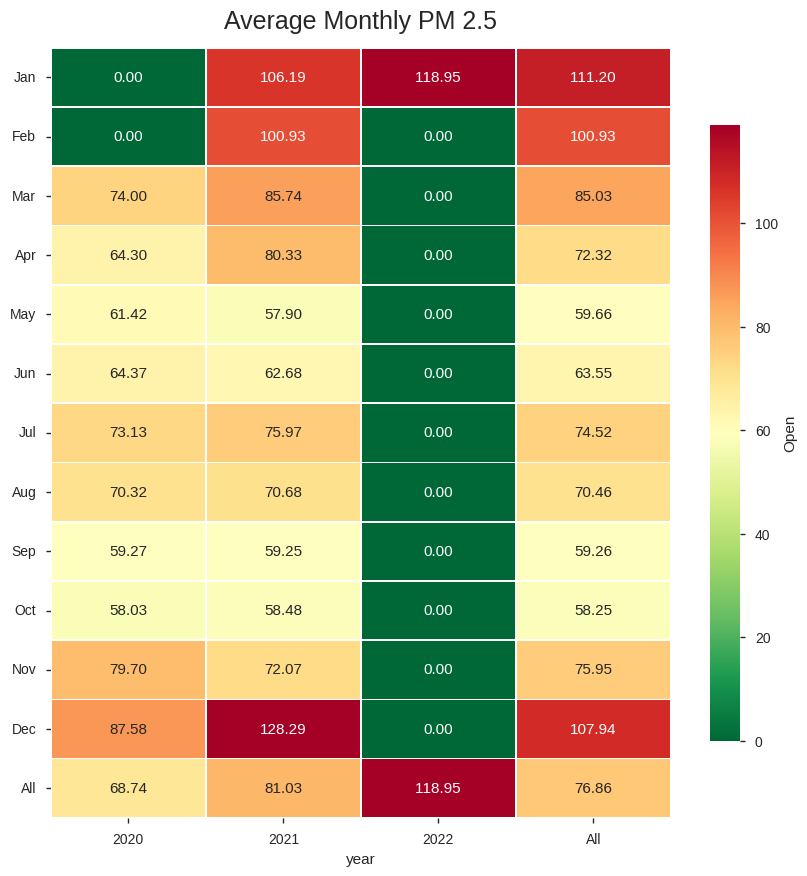

In [109]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Monthly PM 2.5', fontdict={'fontsize':18},    pad=14);

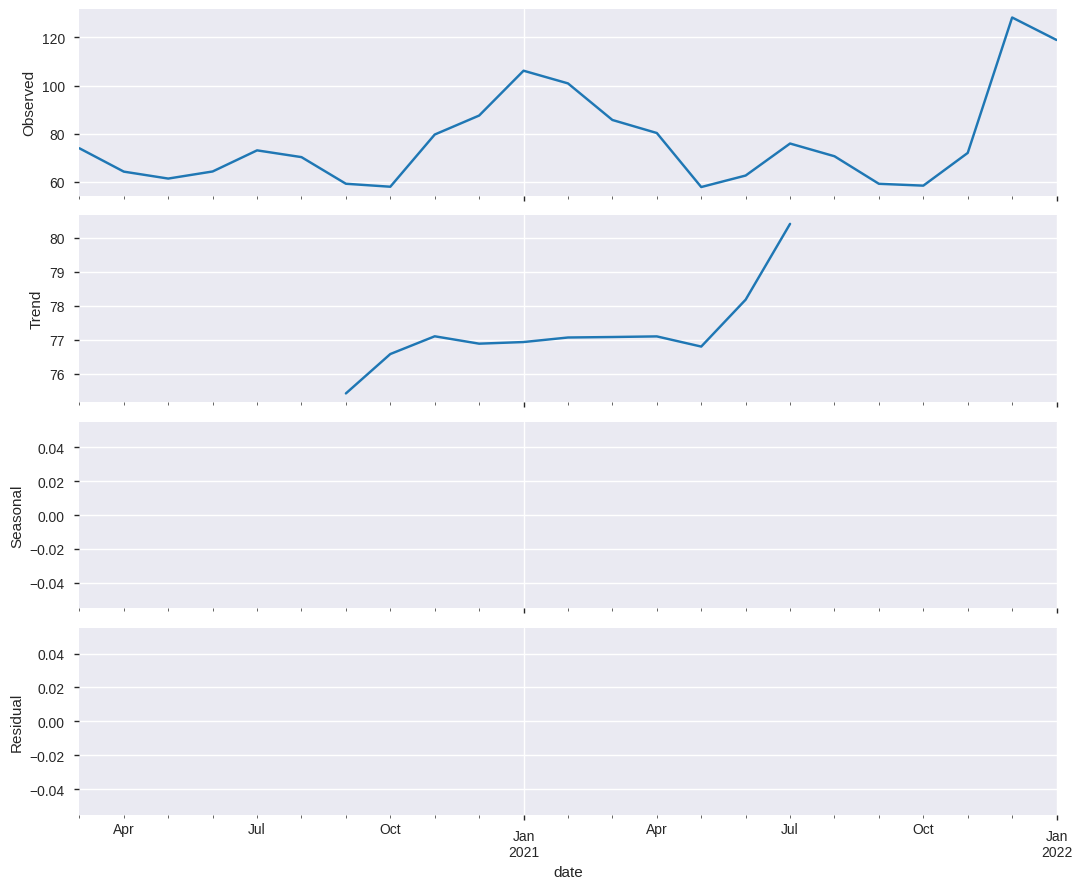

In [110]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month[' pm25'], model='Additive')
fig = decomposition.plot()
plt.show()

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing

In [112]:
forecast = int(50)
df['prediction'] = df[' pm25'].shift(-forecast)
x = np.array(df.drop(['prediction'],1))
x = preprocessing.scale(x)
x_forecast = x[-forecast:]
x = x[:-forecast]
y=np.array(df['prediction'])
y=y[:-forecast]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [113]:
# Training
clf = LinearRegression()
clf.fit(x_train,y_train)
# Testing
accuracy = clf.score(x_test, y_test)
print("accuracy: ", accuracy)

accuracy:  0.029494560197985575


In [114]:
forecast_prediction = clf.predict(x_forecast)
print(forecast_prediction)

[67.98437958 68.15602224 68.49930755 68.49930755 67.29780896 67.98437958
 65.40973974 66.26795302 65.40973974 66.26795302 67.81273693 68.67095021
 67.1261663  68.84259286 66.09631037 66.95452365 72.680701   70.44934647
 67.01649334 65.30006678 68.56127725 68.21799194 68.56127725 70.10606116
 69.76277584 70.62098912 70.10606116 71.99413037 69.76277584 68.56127725
 69.07620522 66.50156538 67.87470662 67.87470662 66.50156538 66.67320803
 66.67320803 68.90456256 67.70306397 65.64335209 65.98663741 67.01649334
 68.21799194 69.9344185  68.90456256 69.76277584 71.02624413 60.82309129
 63.22608847 66.72091129]


<function matplotlib.pyplot.show>

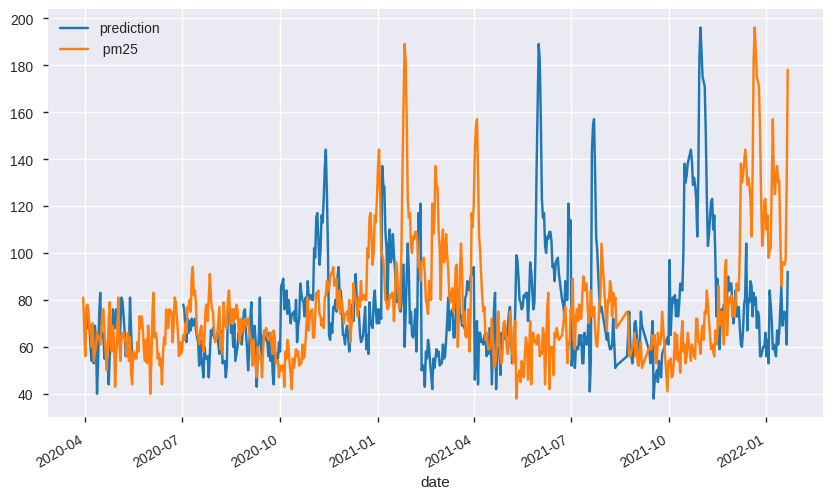

In [115]:
df.plot(y=['prediction',' pm25'], figsize=(10, 6))
plt.show

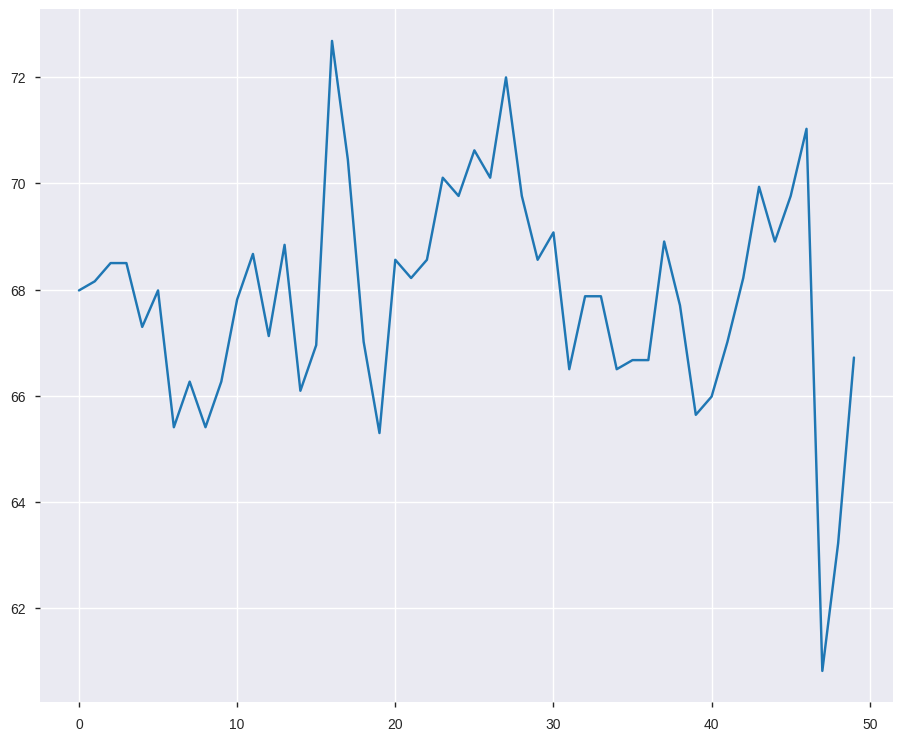

In [116]:
plt.plot(forecast_prediction)
plt.show()